In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

# Import Helper Functions

In [293]:
import ParseLP
importlib.reload(ParseLP)
from ParseLP import convert2df, calculate_num_aircrafts

# Testing

In [294]:
# output_file = 'variable_values'
output_file = 'output_108 miles_10min(2)'
specificn, specificu, specificc = convert2df(output_file)

In [295]:
# Obtain Airport Specific Aircraft States
specificu01 = specificu[specificu['i'] == 0].reset_index(drop=True)
specificu10 = specificu[specificu['i'] == 1].reset_index(drop=True)

specificc01 = specificc[specificc['i'] == 0].reset_index(drop=True)
specificc10 = specificc[specificc['i'] == 1].reset_index(drop=True)

specificn01 = specificn[specificn['i'] == 0].reset_index(drop=True)
specificn10 = specificn[specificn['i'] == 1].reset_index(drop=True)

In [296]:
# Load Charging Time Array
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 6.913363091,
#         9.685271742, 16.30528373, 71.41103553]

gamma = [1.567183013,1.670689686,1.79349788,1.935972287,2.103057098,
         2.30172949,2.541890384,2.83806663,3.212473781,3.70088931,
         4.364896382,5.32037536,6.814736187,9.490547548,15.74119426,55.66984127]
gamma = np.array(gamma) / 5
gamma = np.ceil(gamma)

In [297]:
specificn01

,t,i,k,amount,name
0,0,0,1,2.0,n
1,0,0,3,3.0,n
2,0,0,12,2.0,n
3,1,0,1,4.0,n
4,1,0,3,4.0,n
...,...,...,...,...,...
75,296,0,5,3.0,n
76,296,0,7,1.0,n
77,297,0,1,2.0,n
78,297,0,3,3.0,n


In [298]:
tau_list = [[[0, 5.92], [5.85, 0]],
            [[0, 9.82], [10.59, 0]],
            [[0, 13.40], [13.59, 0]],
            [[0, 19.35], [19.39, 0]],
            [[0, 23.47], [23.67, 0]],
            [[0, 28.19], [28.20, 0]],
            [[0, 32.17], [32.39, 0]],
            [[0, 36.50], [36.75, 0]],
            [[0, 41.40], [41.37, 0]]]

kappa_list = [[[0, 12.35], [11.91, 0]],
              [[0, 16.04], [17.11, 0]],
              [[0, 18.88], [19.06, 0]],
              [[0, 26.52], [26.71, 0]],
              [[0, 30.35], [31.09, 0]],
              [[0, 36.31], [36.40, 0]],
              [[0, 39.58], [40.16, 0]],
              [[0, 44.05], [44.72, 0]],
              [[0, 50.86], [50.71, 0]]]
# gamma = [3.237872699, 3.729470167, 4.404786588, 5.379957014, 
#          6.913363091, 9.685271742, 16.30528373, 71.41103553]
# gamma = [1.567183013,1.670689686,1.79349788,1.935972287,2.103057098,
#          2.30172949,2.541890384,2.83806663,3.212473781,3.70088931,
#          4.364896382,5.32037536,6.814736187,9.490547548,15.74119426,55.66984127]

tau = tau_list[8]
tau = np.array(tau)
tau = tau / 5
tau = np.ceil(tau)


In [299]:
tau = tau.astype(int)

In [300]:
tau

array([[0, 9],
       [9, 0]])

In [301]:
specificn01['amount'] = specificn01['amount'].astype(int)
lax_all_c, lax_all_n, lax_all_u = calculate_num_aircrafts(specificc01, specificu01, specificn01, gamma=gamma, flight_time=tau)
dtla_all_c, dtla_all_n, dtla_all_u = calculate_num_aircrafts(specificc10, specificu10, specificn10, gamma=gamma, flight_time=tau)
all_c, all_n, all_u = calculate_num_aircrafts(specificc, specificu, specificn, gamma=gamma, flight_time=tau)

# State Visulization

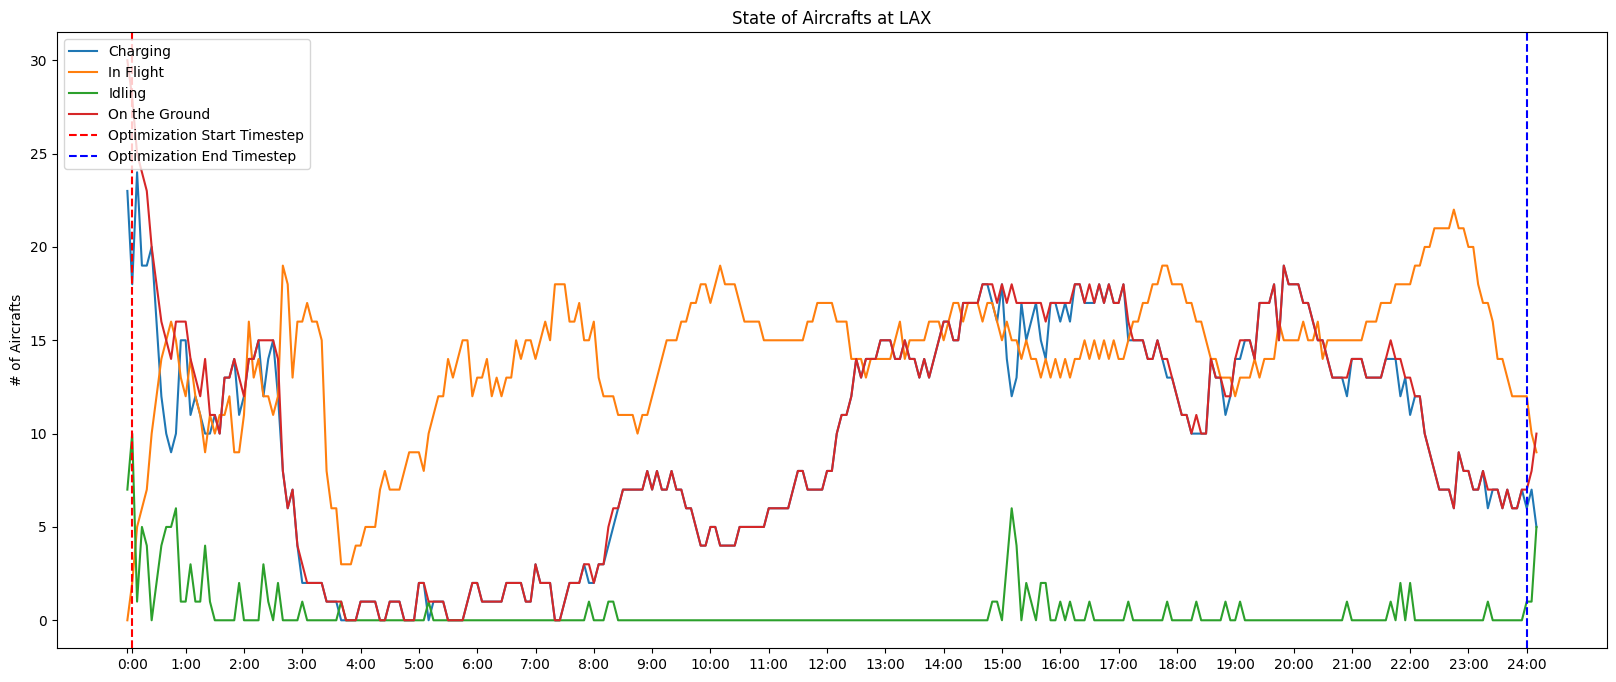

In [302]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(lax_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(lax_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(lax_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((lax_all_c.sum(axis=0)[x0:x1] + lax_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at LAX',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');

In [303]:
print('At t = 0, c =', lax_all_c.sum(axis=0)[x0:x1][0], '; u=', lax_all_u.sum(axis=0)[x0:x1][0], '; n=', lax_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', lax_all_c.sum(axis=0)[x0:x1][286], '; u=', lax_all_u.sum(axis=0)[x0:x1][286], '; n=', lax_all_n.sum(axis=0)[x0:x1][286])

At t = 0, c = 23.0 ; u= 0.0 ; n= 7.0
At t = 290, c = 6.0 ; u= 12.0 ; n= 0.0


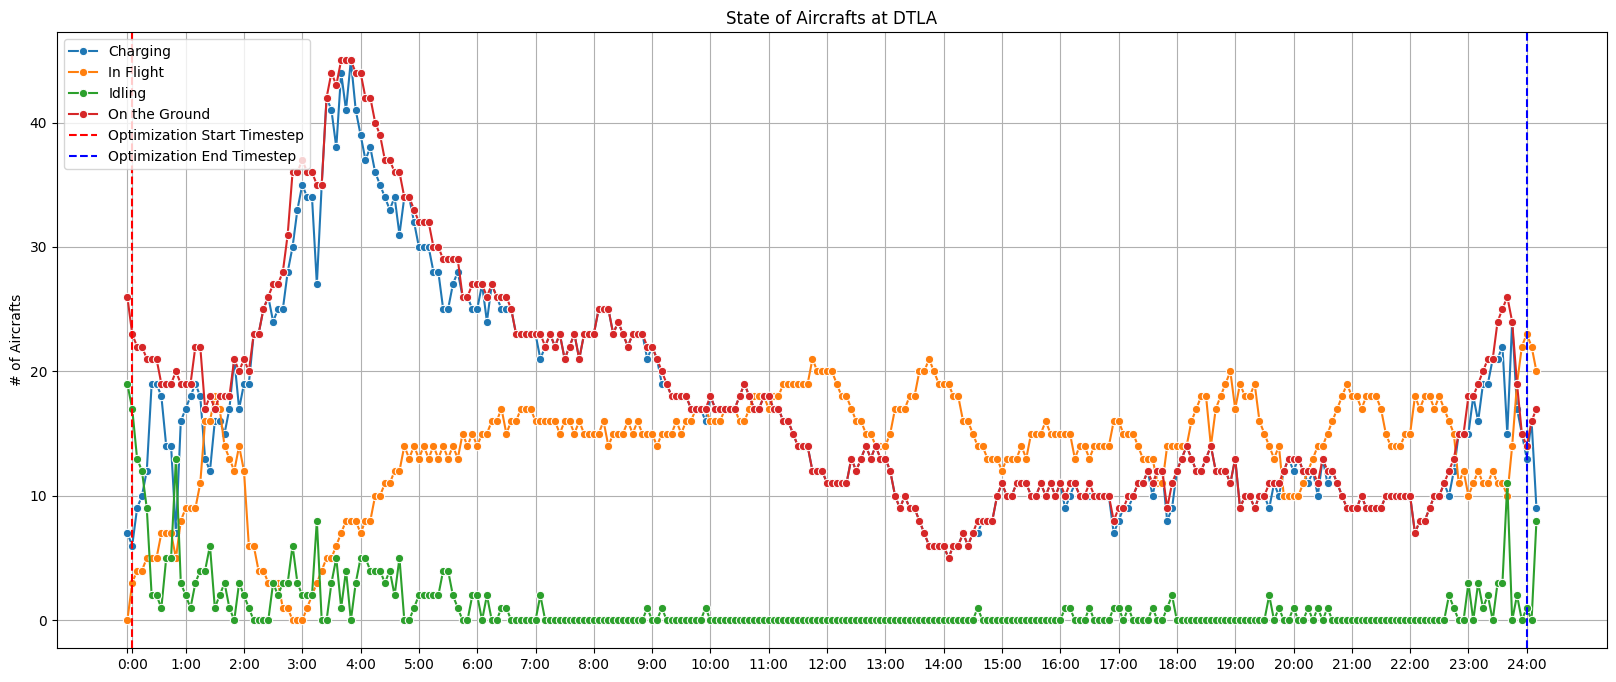

In [304]:
x0 = 0
x1 = 291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(dtla_all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax, marker='o')
sns.lineplot(dtla_all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax, marker='o')
sns.lineplot(dtla_all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax, marker='o')
sns.lineplot((dtla_all_c.sum(axis=0)[x0:x1] + dtla_all_n.sum(axis=0)[x0:x1]), label='On the Ground', ax=ax, marker='o')
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts at DTLA',
       ylabel='# of Aircrafts',
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
plt.grid()

In [305]:
print('At t = 0, c =', dtla_all_c.sum(axis=0)[x0:x1][0], '; u=', dtla_all_u.sum(axis=0)[x0:x1][0], '; n=', dtla_all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', dtla_all_c.sum(axis=0)[x0:x1][290], '; u=', dtla_all_u.sum(axis=0)[x0:x1][290], '; n=', dtla_all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 7.0 ; u= 0.0 ; n= 19.0
At t = 290, c = 9.0 ; u= 20.0 ; n= 8.0


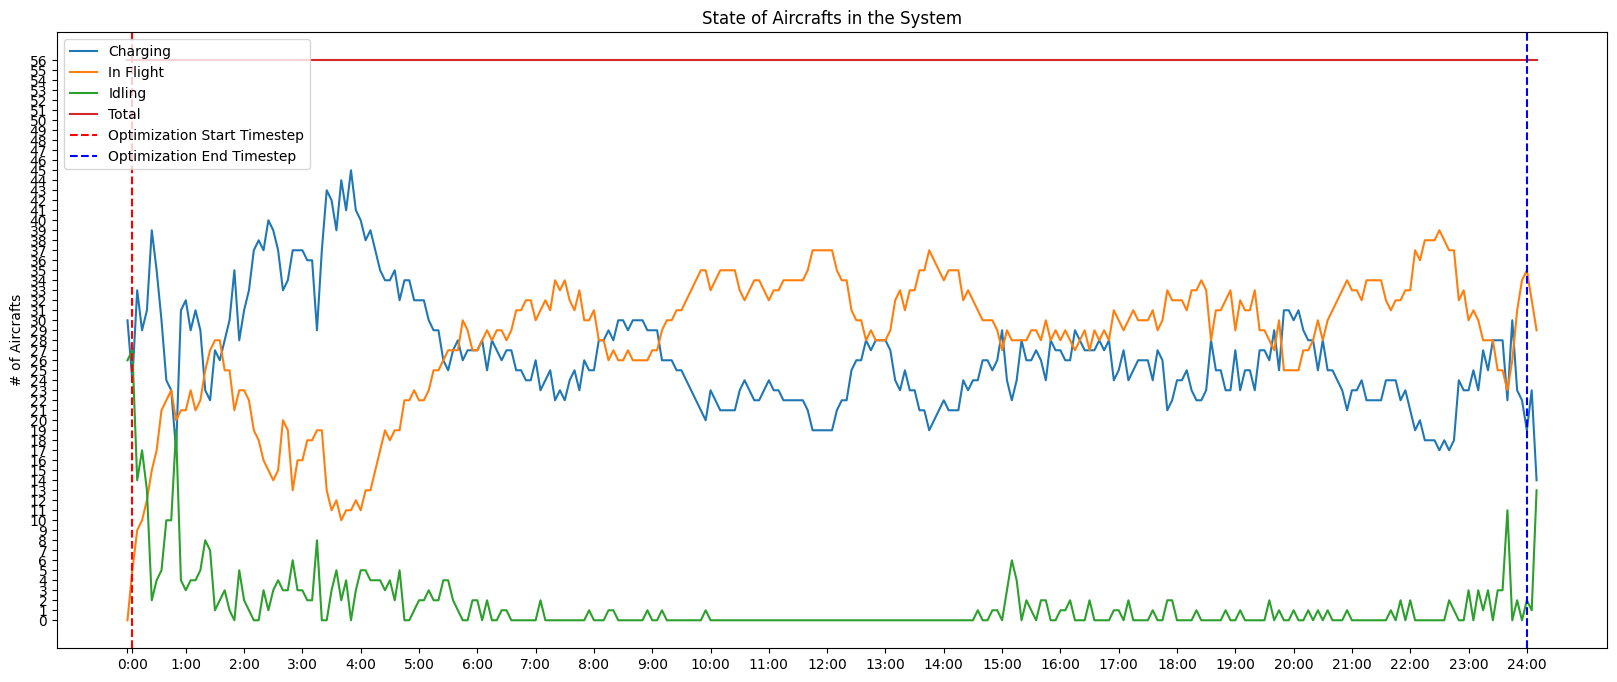

In [306]:
x0=0
x1=291

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(all_c.sum(axis=0)[x0:x1], label='Charging', ax=ax)
sns.lineplot(all_u.sum(axis=0)[x0:x1], label='In Flight', ax=ax)
sns.lineplot(all_n.sum(axis=0)[x0:x1], label='Idling', ax=ax)
sns.lineplot((all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1]), label='Total', ax=ax)
ax.axvline(x=1, color='red', linestyle='--', label='Optimization Start Timestep')
ax.axvline(x=288, color='blue', linestyle='--', label='Optimization End Timestep')
ax.set(title='State of Aircrafts in the System',
       ylabel='# of Aircrafts',
       yticks=np.arange(0, (all_c.sum(axis=0)[x0:x1] + all_u.sum(axis=0)[x0:x1] + all_n.sum(axis=0)[x0:x1])[0]+1),
       xticks=np.concatenate([np.array([0,1]), np.arange(12,300, 12)]),
       xticklabels=['']+[str(i)+':00' for i in range(0,25)])
plt.legend(loc='upper left');
# plt.xlim([0, 10])

In [291]:
print('At t = 0, c =', all_c.sum(axis=0)[x0:x1][0], '; u=', all_u.sum(axis=0)[x0:x1][0], '; n=', all_n.sum(axis=0)[x0:x1][0])
print('At t = 290, c =', all_c.sum(axis=0)[x0:x1][290], '; u=', all_u.sum(axis=0)[x0:x1][290], '; n=', all_n.sum(axis=0)[x0:x1][290])

At t = 0, c = 26.0 ; u= 0.0 ; n= 23.0
At t = 290, c = 22.0 ; u= 26.0 ; n= 1.0
